# Imports

In [22]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

from HANKStickyModel import HANKStickyModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
# model = HANKStickyModelClass(name='test')
model = HANKStickyModelClass(name='baseline_2602', par = {'beta_mean': 0.9988,
                                                         'sigma_e': 0.36})

In [26]:
# model.load()
model.find_ss(do_print=True)

find beta for market clearing
 [beta, sigma_e] = [  0.998800000000,   0.360000000000] -> [ss.clearing_Y =   0.000231564242, ss.clearing_MPC =  -0.003893598190] [14.7 secs]
 [beta, sigma_e] = [  0.998800000000,   0.360000000000] -> [ss.clearing_Y =   0.000231564242, ss.clearing_MPC =  -0.003893598190] [11.3 secs]
 [beta, sigma_e] = [  0.998800000000,   0.360000000000] -> [ss.clearing_Y =   0.000231564242, ss.clearing_MPC =  -0.003893598190] [11.5 secs]
 [beta, sigma_e] = [  0.998800014883,   0.360000000000] -> [ss.clearing_Y =   0.000231505769, ss.clearing_MPC =  -0.003892680925] [11.2 secs]
 [beta, sigma_e] = [  0.998800000000,   0.360000005364] -> [ss.clearing_Y =   0.000231563740, ss.clearing_MPC =  -0.003893593267] [11.1 secs]
 [beta, sigma_e] = [  0.998870226555,   0.359526595375] -> [ss.clearing_Y =  -0.000003386733, ss.clearing_MPC =   0.000022871562] [11.7 secs]
 [beta, sigma_e] = [  0.998870675861,   0.359471319250] -> [ss.clearing_Y =   0.000000061321, ss.clearing_MPC =   0.00

In [27]:
 par = model.par
ss = model.ss

par.Theta * ss.K ** par.alpha * ss.N ** (1-par.alpha)

1.0

In [31]:
1 / (1 - 0.86)

7.142857142857142

In [41]:
1 / (1 + ss.r)

0.9878765474230741

In [42]:
1/0.66

1.5151515151515151

In [29]:
ss.rk * ss.K / ss.s

0.24153040201445486

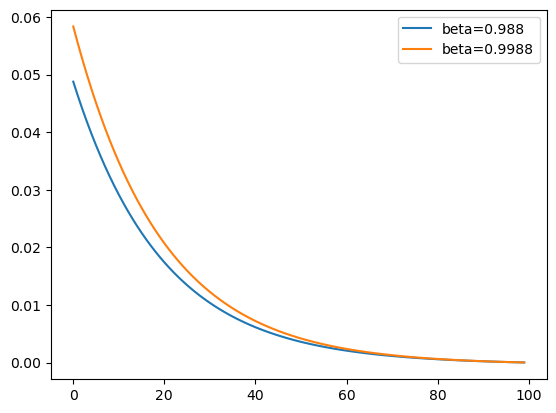

In [40]:
T = 100
rho = 0.95
jump = 0.1
s = np.array([jump * rho ** t for t in range(T)])
pi = np.zeros_like(s)
pi2 = np.zeros_like(s)
kappa = 0.03
b = 0.988
b2 = 0.9988
for t_ in range(T):
    t = T - t_ - 1
    if t == T - 1:
        Pi_plus = 0
        Pi_plus2 = 0
    else:
        Pi_plus = pi[t+1]
        Pi_plus2 = pi2[t+1]
    pi[t] = kappa * s[t] + b * Pi_plus
    pi2[t] = kappa * s[t] + b2 * Pi_plus2
fix, ax = plt.subplots()
ax.plot(np.arange(T), pi, label=f'beta={b}')
ax.plot(np.arange(T), pi2, label=f'beta={b2}')
ax.legend()

In [18]:
# model2 = HANKStickyModelClass(name='test')
# model2.load()
# for key, value in model2.par.__dict__.items():
#     model.par.__dict__[key] = value
# for key, value in model2.ss.__dict__.items():
#     model.ss.__dict__[key] = value

In [5]:
# model.name = 'baseline_0103'
# model.save()
# print(f'model saved under name {model.name}')

In [6]:
ss = model.ss
par = model.par

In [80]:
model.par.phi_G = 1.0
model.par.phi_pi = 1.25
model.par.rho_m = 0.89
model.par.phi_tau = 0.1
model.blocks = [
            'blocks.production_firm',
            'blocks.capital_firm',
            'blocks.price_setters_no_indexation',
            'blocks.mutual_fund',
            'blocks.government',
            'hh',
            'blocks.union_no_indexation',
            'blocks.taylor',
            'blocks.fisher',
            'blocks.real_wage',
            'blocks.market_clearing']

# model.par.rho_eg = 0.85
# model.par.jump_eg = 0.00
# model.par.jump_eg_transfer = 0.0
# model.par.jump_em = 0.00025
# model.par.rho_em = 0.6
model.par.rho_eg = 0.85
model.par.jump_eg = 0.01
model.par.jump_eg_transfer = 0.0
model.par.jump_em = 0.0
delta_G = model.par.jump_eg * model.par.rho_eg ** np.arange(model.par.T)
print(f'Shock with parameters jump = {model.par.jump_eg}, rho = {model.par.rho_eg} leads to a total spending increase of {delta_G.sum()*100:.2f}%')

Shock with parameters jump = 0.01, rho = 0.85 leads to a total spending increase of 6.67%


In [81]:
# model.compute_jacs(do_print=True)
model._compute_jac(inputs='unknowns',do_print=True)
model._compute_jac(inputs='shocks',do_print=True)

full Jacobian to unknowns computed in 3.9 secs [in evaluate_blocks(): 1.7 secs]
full Jacobian to shocks computed in 1.7 secs [in evaluate_blocks(): 0.4 secs]


In [62]:
# model.par.tol_broyden = 7e-8
model.find_transition_path(shocks=['eg'], do_print=True, do_print_unknowns=False)

finding the transition path:
 it =   0 -> max. abs. error = 1.45e-03
   0.00e+00 in fisher_res
   0.00e+00 in w_res
   1.45e-03 in clearing_Y
   0.00e+00 in invest_res
   0.00e+00 in NKPC_res
   5.27e-06 in NKPC_w_res
   1.78e-15 in clearing_K
 it =   1 -> max. abs. error = 4.21e-05
   2.11e-09 in fisher_res
   1.57e-08 in w_res
   2.34e-06 in clearing_Y
   2.31e-05 in invest_res
   2.53e-09 in NKPC_res
   1.14e-07 in NKPC_w_res
   4.21e-05 in clearing_K
 it =   2 -> max. abs. error = 3.96e-07
   3.27e-11 in fisher_res
   2.99e-10 in w_res
   4.72e-08 in clearing_Y
   3.96e-07 in invest_res
   3.02e-11 in NKPC_res
   2.34e-09 in NKPC_w_res
   2.79e-07 in clearing_K
 it =   3 -> max. abs. error = 6.56e-08
   1.24e-11 in fisher_res
   6.47e-11 in w_res
   1.74e-09 in clearing_Y
   2.05e-08 in invest_res
   6.35e-12 in NKPC_res
   3.07e-10 in NKPC_w_res
   6.56e-08 in clearing_K
clearing_A: terminal value is   0.00000307, but ss value is   0.00000000

transition path found in 30.3 secs


In [82]:
model.find_IRFs(shocks=['eg'])

### shocks ###


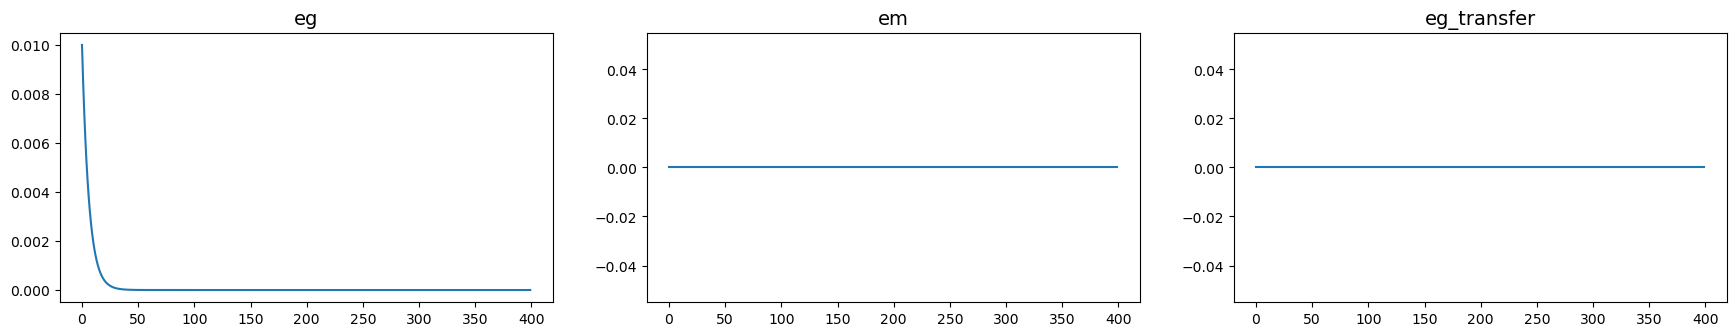


### varnames ###


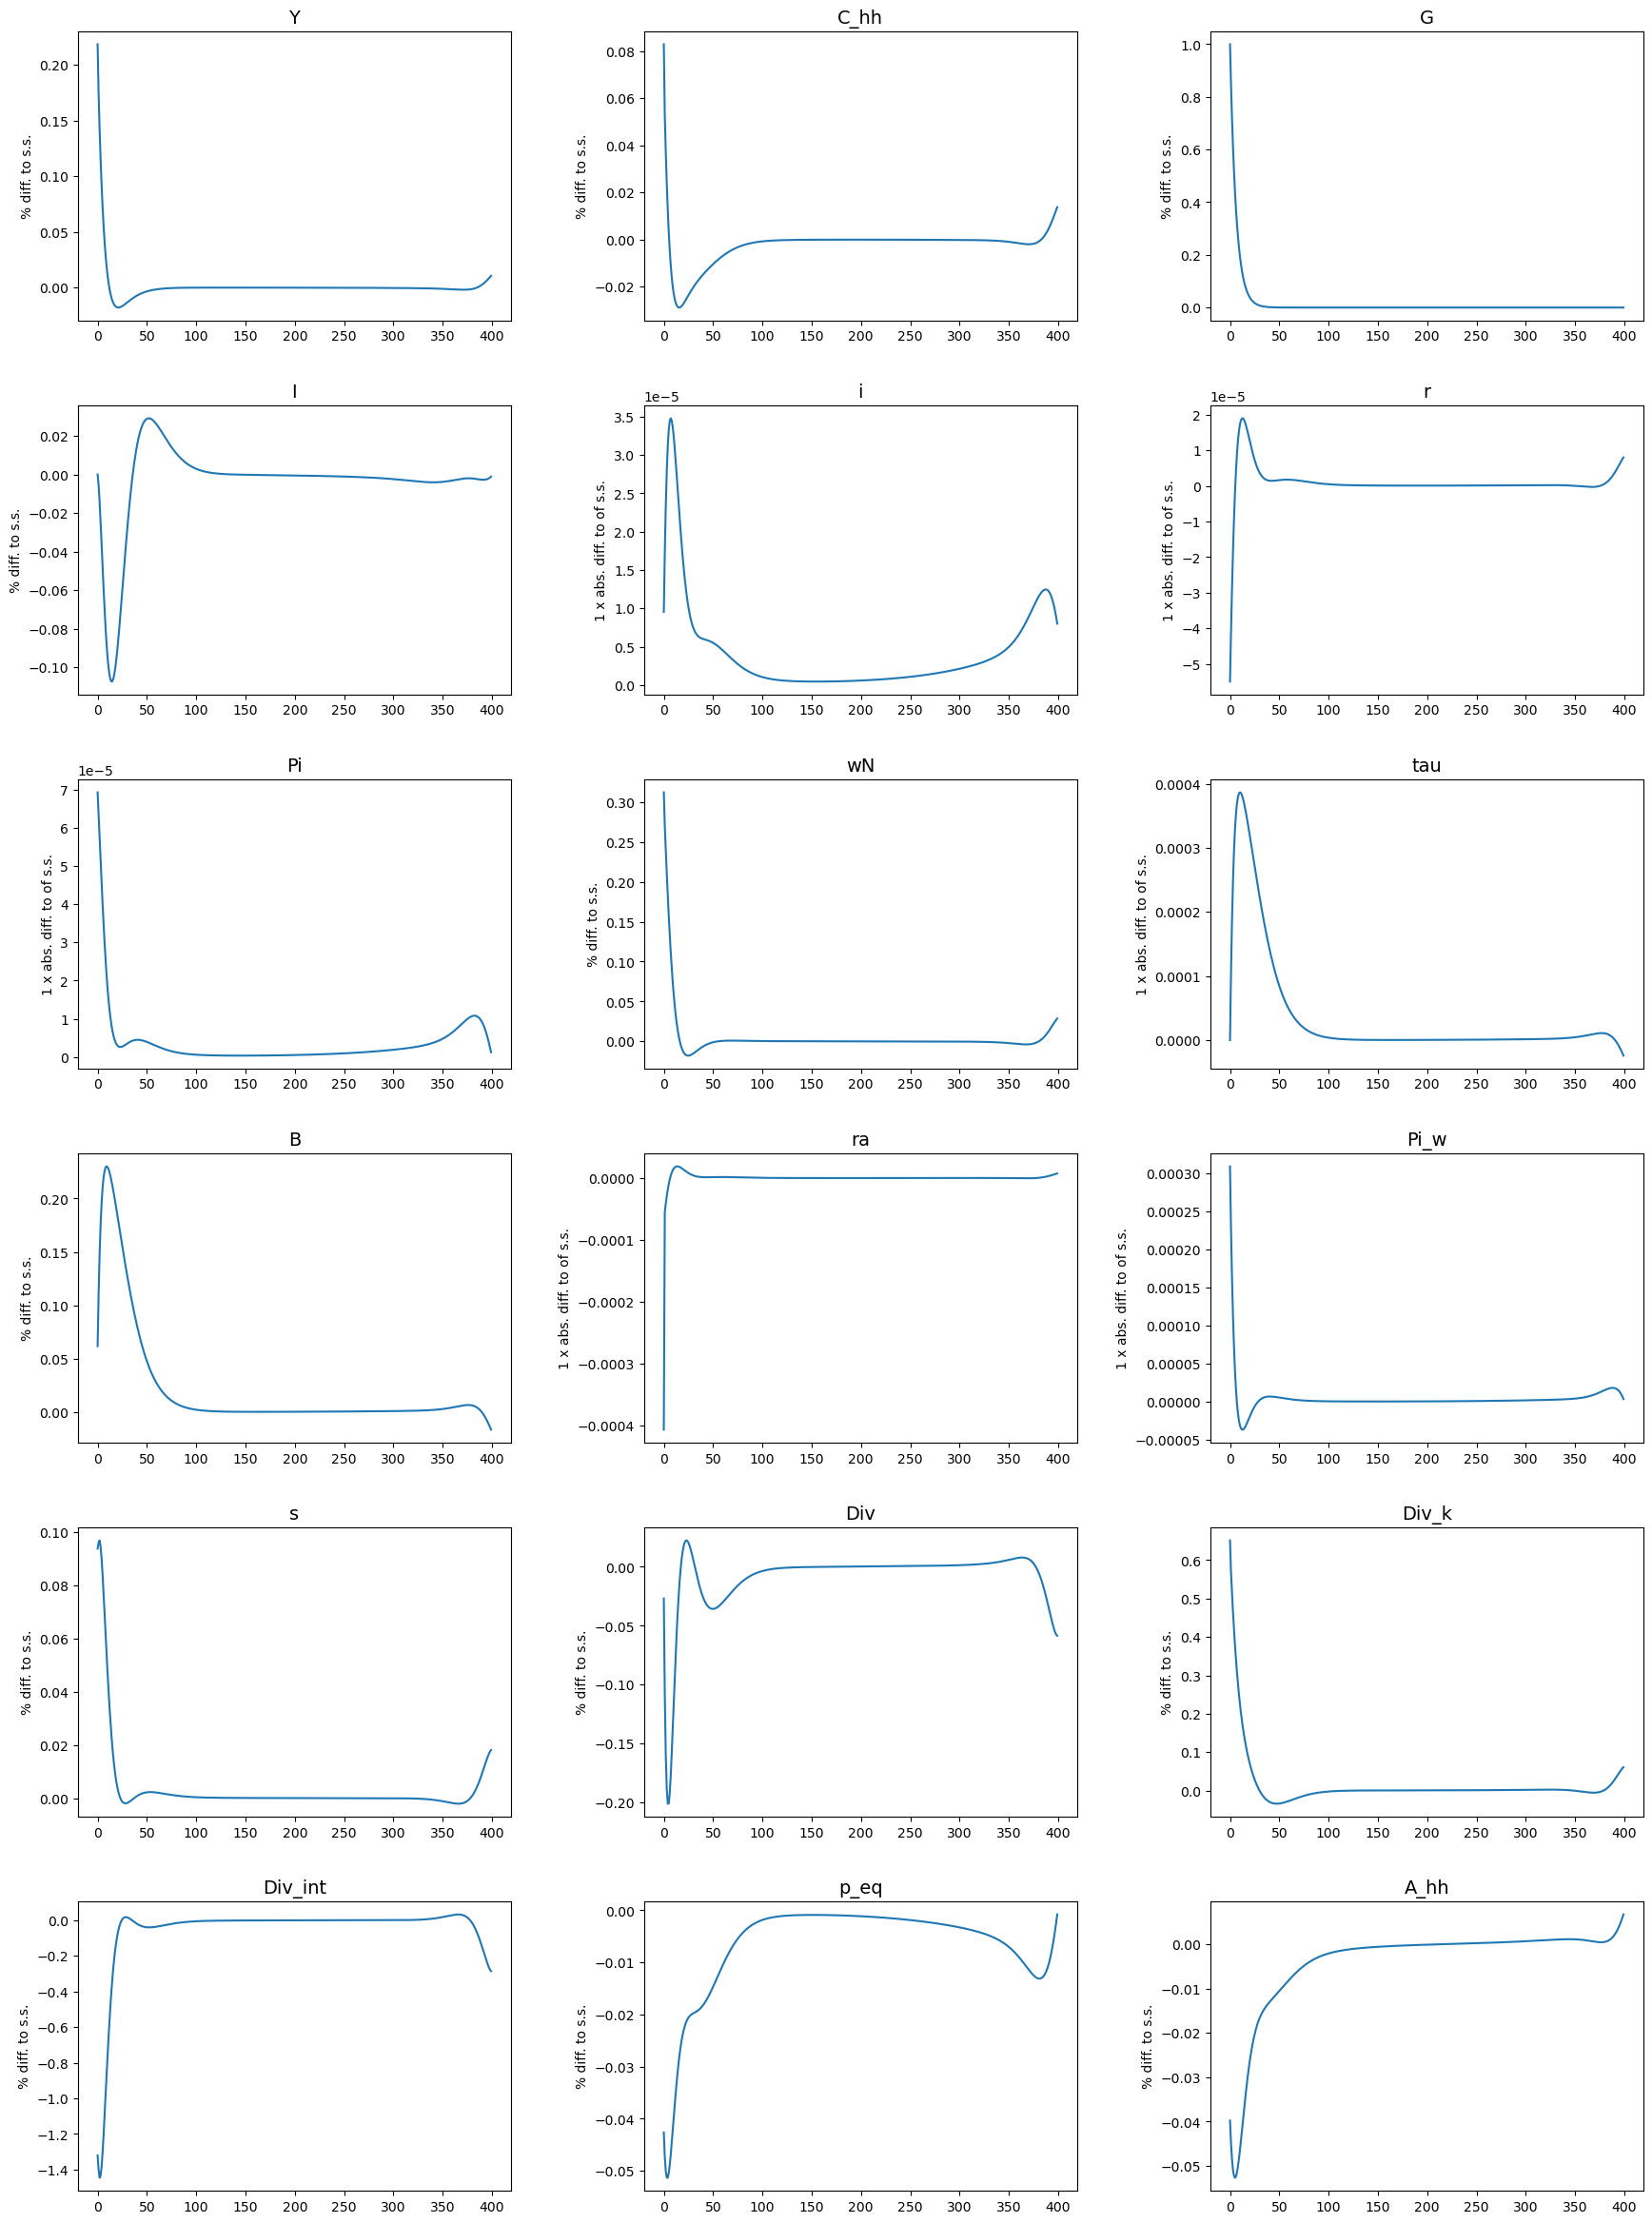

In [88]:
models = [model]
labels = ['baseline no sticky',]
paths = ['Y', 'C_hh', 'G', 'I', 'i', 'r', 'Pi', 'wN', 'tau', 'B','ra', 'Pi_w','s', 'Div', 'Div_k', 'Div_int', 'p_eq', 'A_hh']
paths_short = ['Y', 'C_hh', 'Pi']
lvl_value = ['eg', 'ez', 'em', 'eg_transfer', 'd_tau', 'd_B', 'd_G','eB','etau','eG']
abs_diff = ['tau',  'r', 'Pi', 'i', 'rk','Pi_w','ra']
# facs = {'r':100}
model.show_IRFs(paths,lvl_value=lvl_value,abs_diff=abs_diff,ncols=3,T_max=model.par.T,do_linear=True,do_shocks=True, do_non_linear=False, do_targets=False)
# model.show_IRFs(paths,lvl_value=lvl_value,abs_diff=abs_diff,ncols=3,T_max=25,do_linear=True,do_shocks=True, do_non_linear=True)

In [106]:
ra_ss = ss.ra
A_target = par.A_target

ra = ss.ra # * (1 - 0.01)
a_lag = par.A_target + 0.1
a_ss = par.A_target

d_ss = ra_ss/(1+ra_ss)*(1+ra_ss)*a_ss + par.chi*((1+ra)*a_ss-(1+ra_ss)*A_target)
d_ss_net = d_ss - ss.ra * a_lag

d = ra_ss/(1+ra_ss)*(1+ra)*a_lag + par.chi*((1+ra)*a_lag-(1+ra_ss)*A_target)
d_net = d_ss - ra * a_lag

a_plus = (1 + ra) * a_lag - d
a_plus_ss =(1 + ra_ss) * a_ss - d_ss

print(a_plus - a_plus_ss)
print(d - d_ss)
print(d_net - d_ss_net)

0.09908895498901238
0.002138268453890063
0.0


In [89]:
ss.ra

0.012272234429039353

### shocks ###


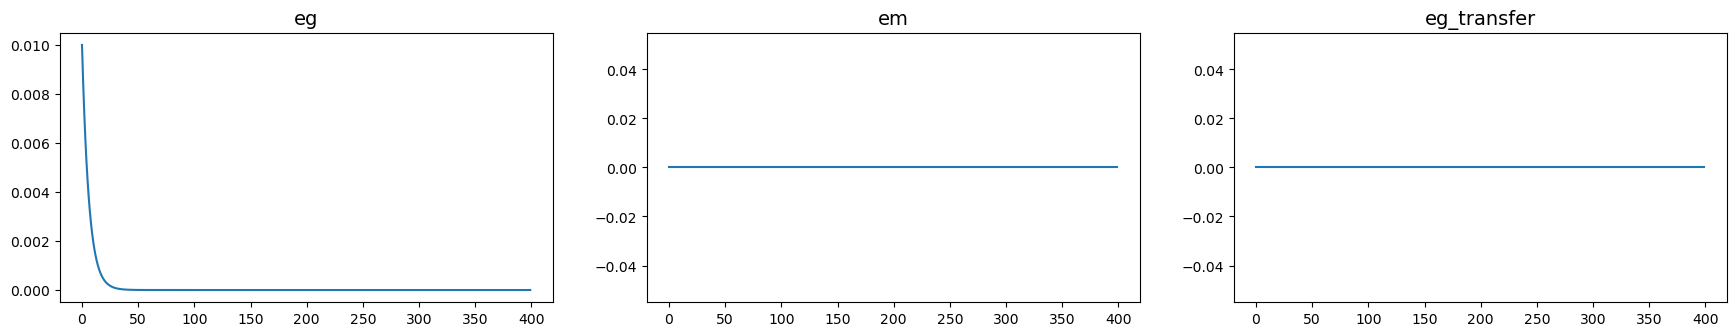


### varnames ###


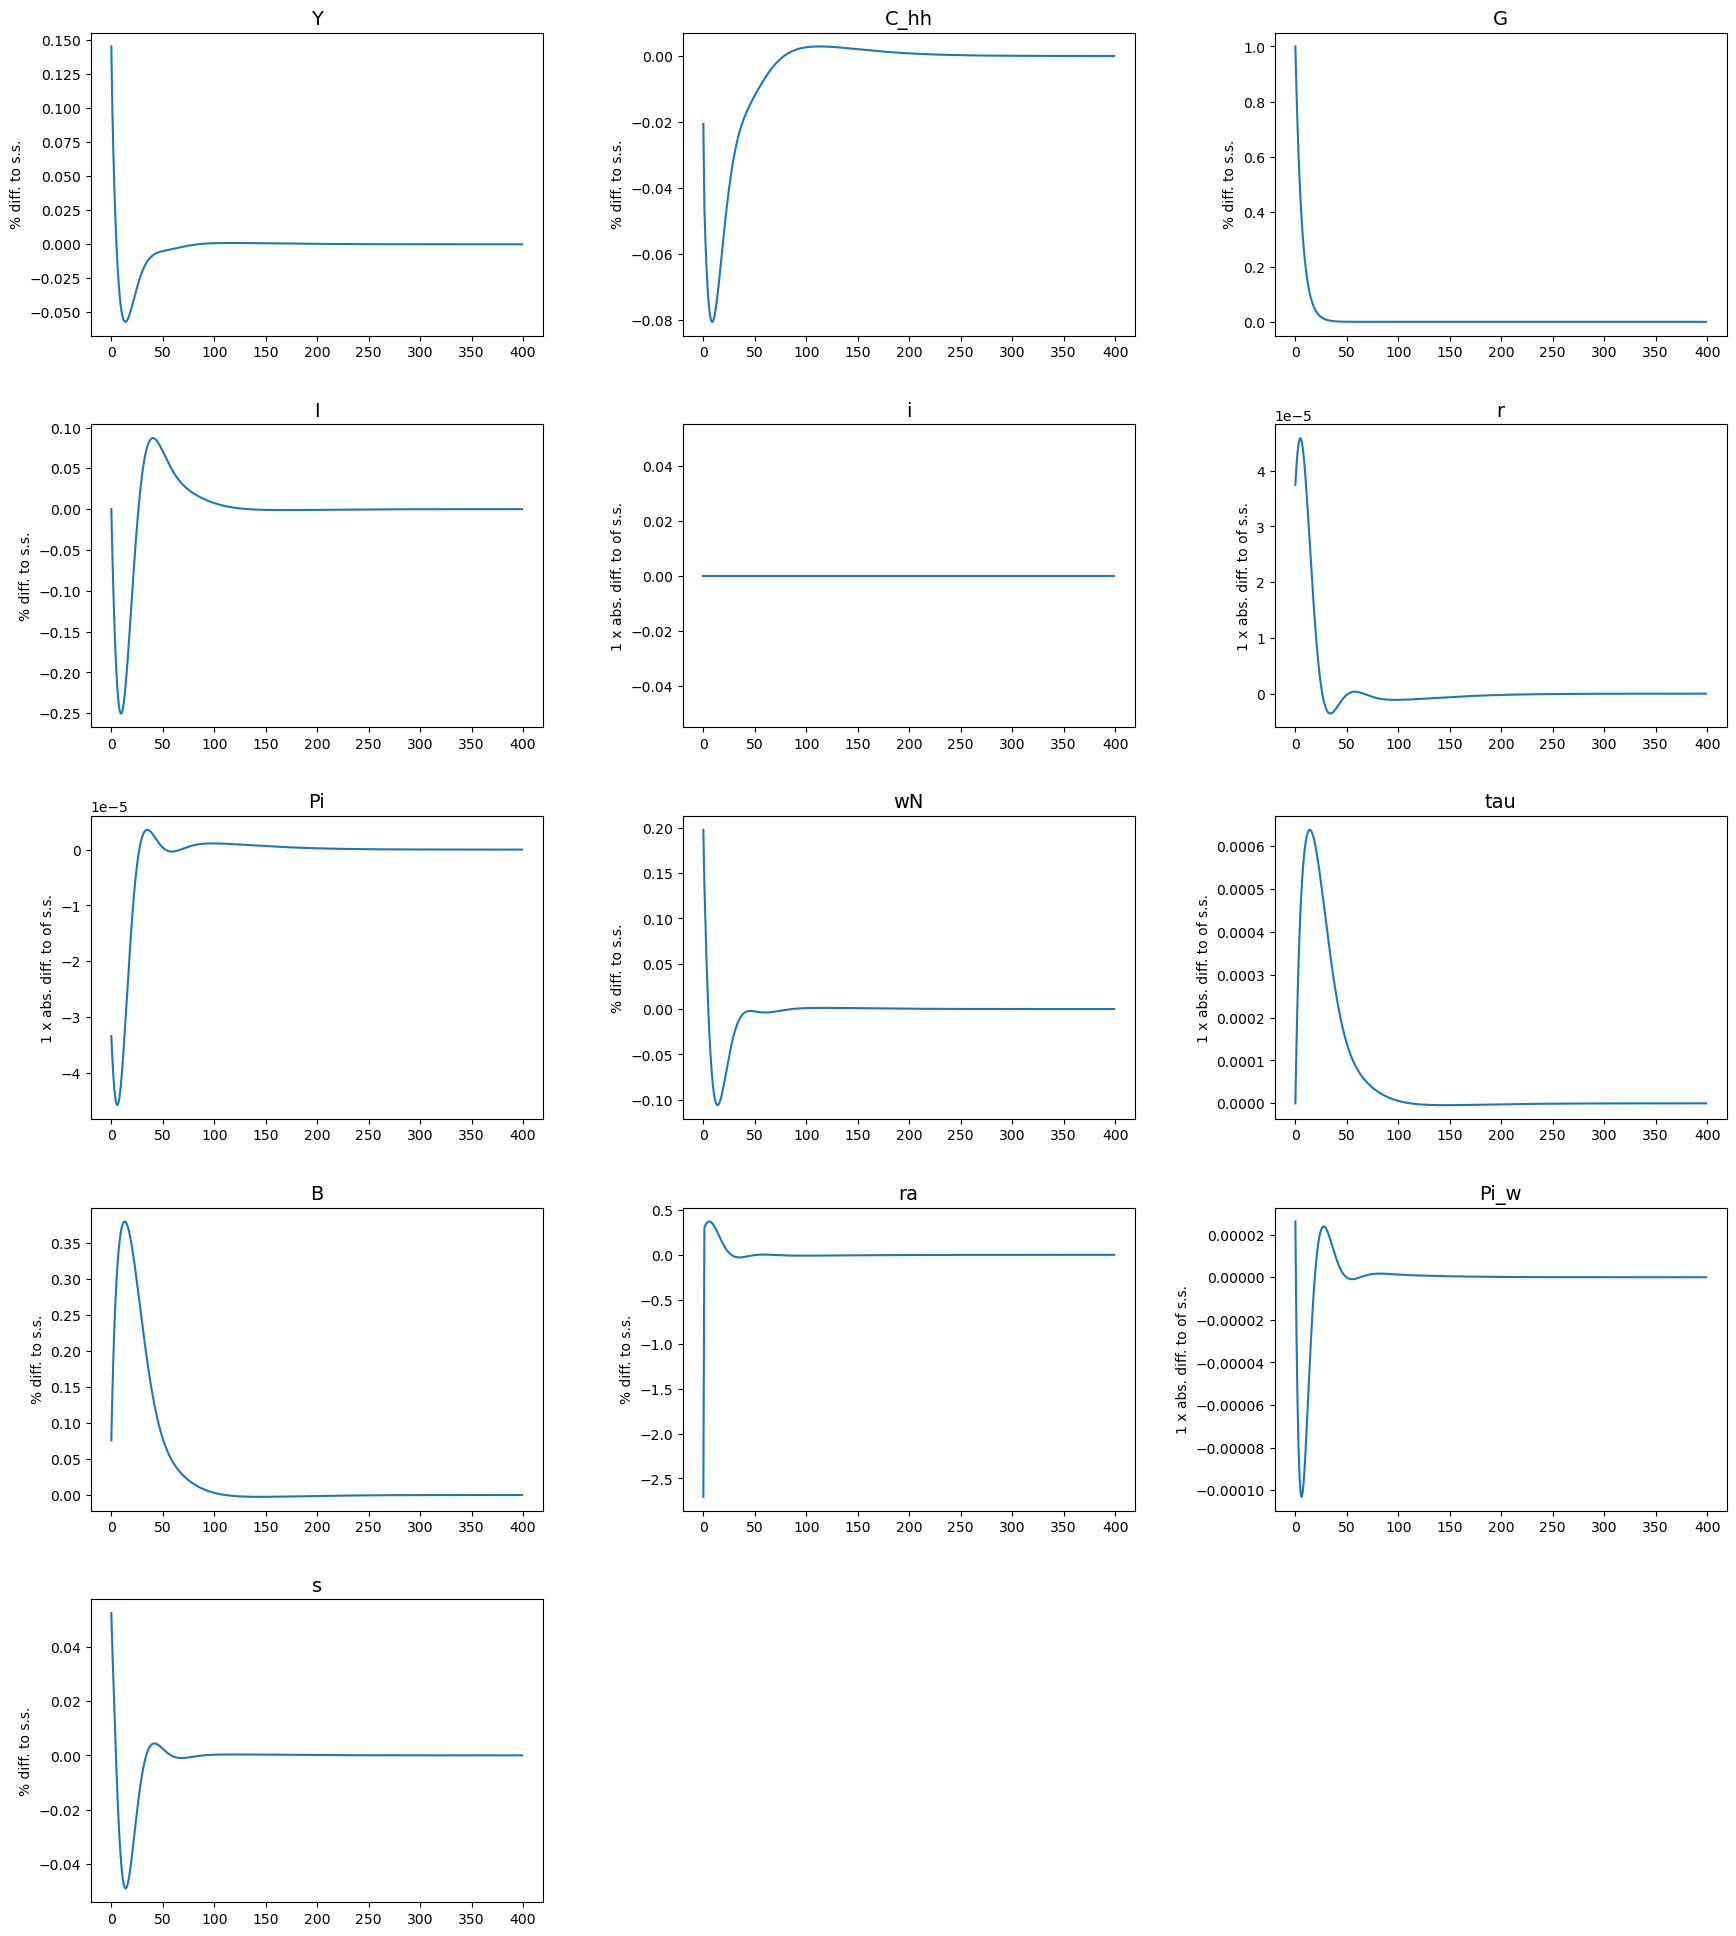


### tagets ###


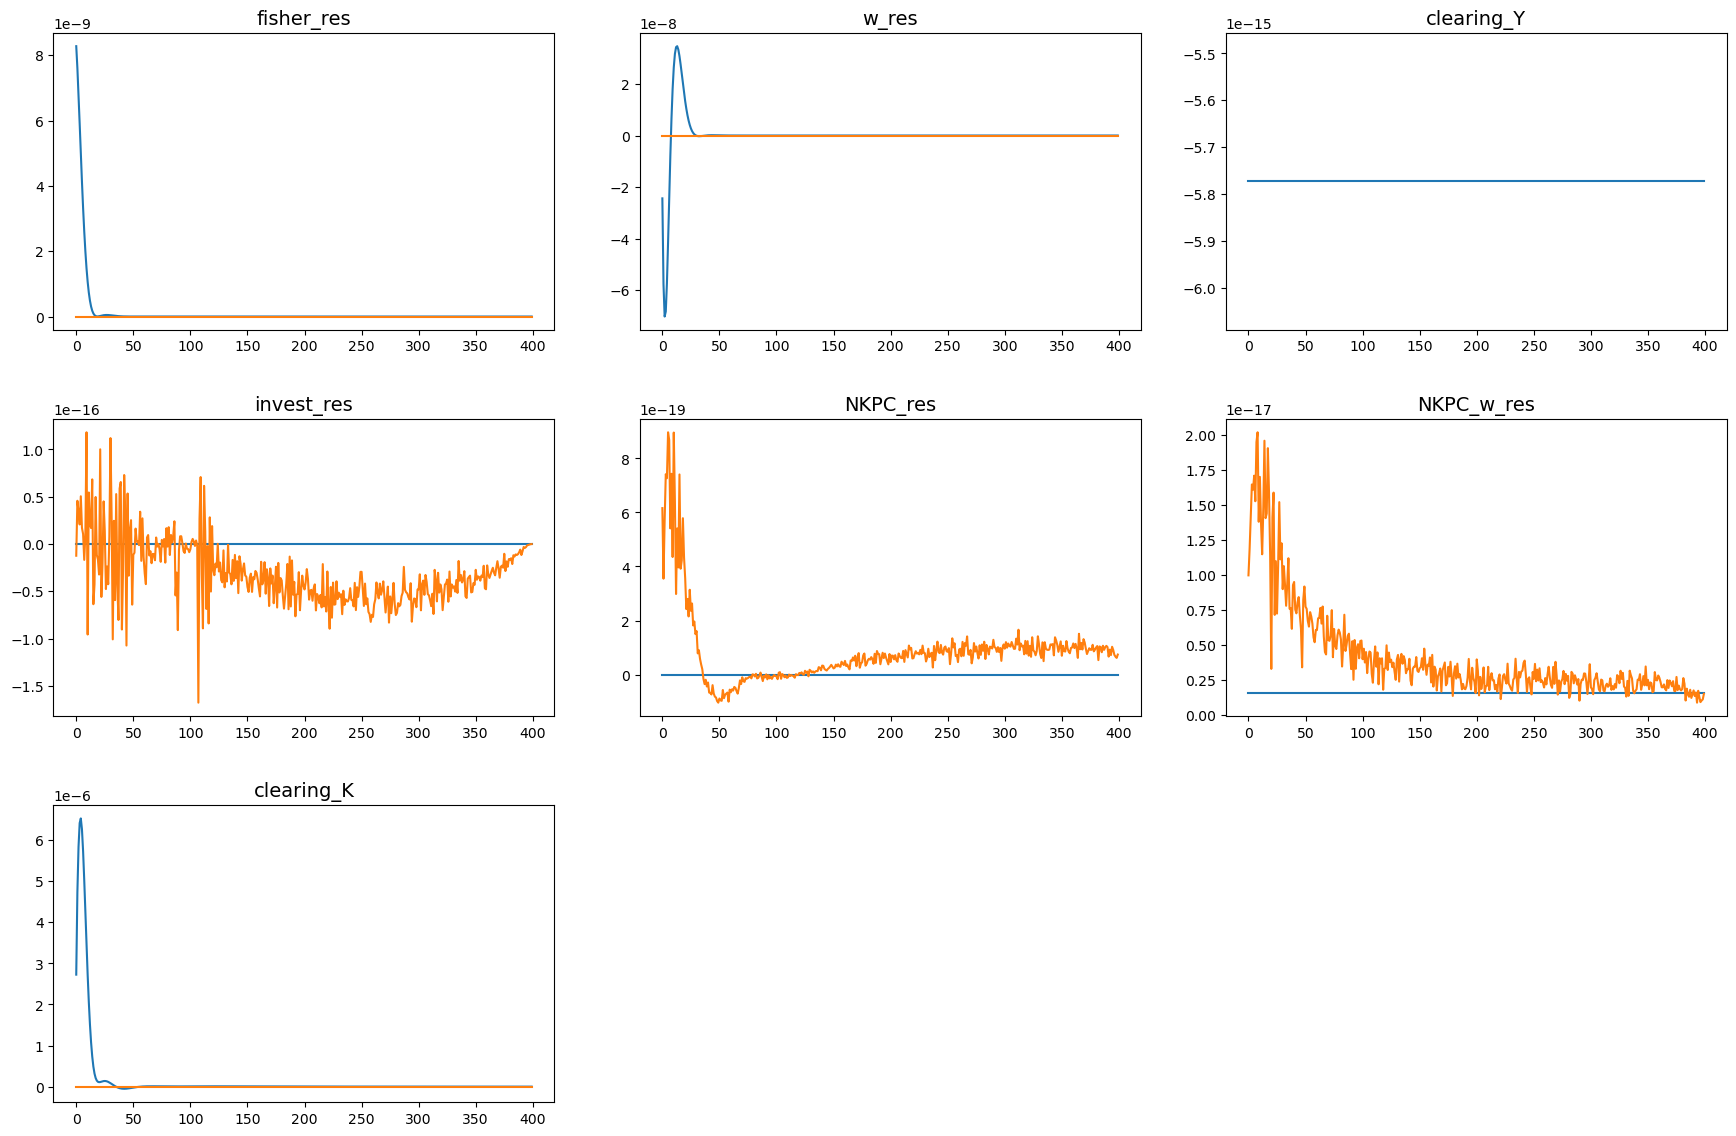

In [57]:
models = [model]
labels = ['baseline no sticky',]
paths = ['Y', 'C_hh', 'G', 'I', 'i', 'r', 'Pi', 'wN', 'tau', 'B','ra', 'Pi_w','s']
paths_short = ['Y', 'C_hh', 'Pi']
lvl_value = ['eg', 'ez', 'em', 'eg_transfer', 'd_tau', 'd_B', 'd_G','eB','etau','eG']
abs_diff = ['tau',  'r', 'Pi', 'i', 'rk','Pi_w']
# facs = {'r':100}
model.show_IRFs(paths,lvl_value=lvl_value,abs_diff=abs_diff,ncols=3,T_max=model.par.T,do_linear=True,do_shocks=True, do_non_linear=False)
# model.show_IRFs(paths,lvl_value=lvl_value,abs_diff=abs_diff,ncols=3,T_max=25,do_linear=True,do_shocks=True, do_non_linear=True)

# Tests

In [ ]:
zero = []
non_zero = []
for key, value in model.jac.items():
    if np.all(value == 0.0):
        zero.append(key)
    else:
        non_zero.append(key)
print(f'zero: {zero}')
print('')
print(f'non zero: {non_zero}')

In [ ]:
print(model.unknowns)
print(model.shocks)
test_jacs = deepcopy(model.jac)
for i_shock,shockname in enumerate(model.shocks):
    for i_unknown, unknownname in enumerate(model.unknowns):
        test_jacs[(unknownname, shockname)] = model.G_U[i_unknown*par.T:(i_unknown+1)*par.T,
                                              i_shock*par.T:(i_shock+1)*par.T]

In [ ]:
test_jacs[('Ip', 'etau')]

# Misc

In [ ]:
# model2 = HANKStickyModelClass(name='baseline')
# model2.load()
# for key, value in model2.par.__dict__.items():
#     model.par.__dict__[key] = value
# for key, value in model2.ss.__dict__.items():
#     model.ss.__dict__[key] = value
# model.ss.__dict__['Kd'] = model.ss.__dict__['K']
# model.ss.__dict__['clearing_K'] = model.ss.__dict__['clearing_Y']

In [ ]:
# model.print_unpack_varlist()

In [ ]:
# model.check_non_lin(0)

In [ ]:
# print(np.max(path.A - path.A_hh))